In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import torch
from torch import nn
DEVICE="cpu"
sns.set_style()
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.family"] = "Rubik"
sns.set_context("paper")

In [2]:
import os; print(os.getcwd())

/PIMP/VehicleMotionPrediction/experiments/approaches/plotting


In [3]:
pcmp_curr_three = torch.load("../runs/final-toy/performance-comparison/PIMP-60-16-P5505-0.001-BICYCLE-CURR-2-WB0.3302-NORESID-CUSTOMLOSS-5/last_model_meta.pt")
pcmp_nocurr = torch.load("../runs/final-toy/performance-comparison/PIMP-60-16-P5505-0.001-BICYCLE-NOCURR-WB0.3302-NORESID-CUSTOMLOSS-4/last_model_meta.pt")
lstm = torch.load("../runs/final-toy/performance-comparison/LSTM-CURVATURE-16-P6044-NOCURR-CUSTOMLOSS-2/last_model_meta.pt")

In [4]:
pcmp_curr_three.keys()

dict_keys(['epoch', 'config', 'train_losses', 'test_losses', 'val_losses', 'race_losses', 'train_ades', 'test_ades', 'val_ades', 'race_ades', 'train_fdes', 'test_fdes', 'val_fdes', 'race_fdes', 'train_heading_errors', 'test_heading_errors', 'val_heading_errors', 'race_heading_errors', 'train_ious', 'val_ious', 'test_ious', 'race_ious'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


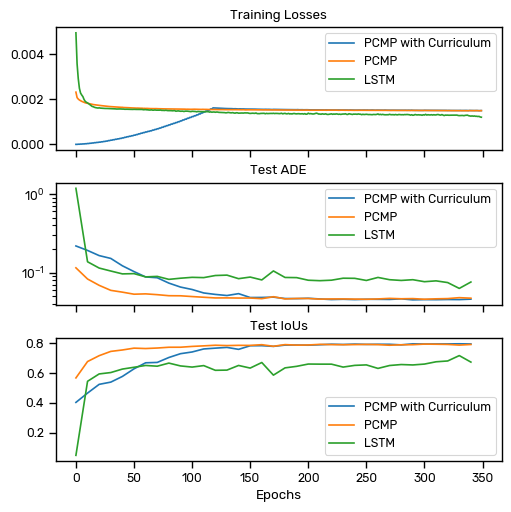

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(5,5), constrained_layout=True, sharex='col')
axs[0].plot(pcmp_curr_three['train_losses'], label='PCMP with Curriculum')
axs[0].plot(pcmp_nocurr['train_losses'], label='PCMP')
axs[0].plot(lstm['train_losses'], label='LSTM')
axs[0].legend()
axs[0].set_title("Training Losses")

axs[1].plot(np.arange(0, 350, 10), pcmp_curr_three['test_ades'], label='PCMP with Curriculum')
axs[1].plot(np.arange(0, 350, 10), pcmp_nocurr['test_ades'], label='PCMP')
axs[1].plot(np.arange(0, 350, 10), lstm['test_ades'], label='LSTM')
axs[1].legend()
axs[1].set_title("Test ADE")

axs[1].semilogy()

axs[2].plot(np.arange(0, 350, 10), pcmp_curr_three['test_ious'], label='PCMP with Curriculum')
axs[2].plot(np.arange(0, 350, 10), pcmp_nocurr['test_ious'], label='PCMP')
axs[2].plot(np.arange(0, 350, 10), lstm['test_ious'], label='LSTM')
axs[2].legend()
axs[2].set_title("Test IoUs")
axs[2].set_xlabel("Epochs")

fig.savefig("loss_plot_vs_ade.eps",bbox_inches='tight')